In [1]:
import json
import numpy as np
import pandas as pd

from pandas.io.json import json_normalize
from scipy.stats import zscore
from scipy.spatial.distance import cdist
import collections

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
ibge = pd.read_csv("filled_ibge.csv", index_col='City')

In [3]:
with open("criminal-index-export.json", "r") as read_file:
    my_json = json.load(read_file)

my_list = []
y = []

for key, value in my_json['rio_grande_do_sul'].items():
    my_list.append(value['2018'])
    y.append(key)

crime_ = pd.DataFrame.from_records(my_list)    
y = pd.DataFrame(y)
crime_['City'] = y

crime_.set_index(['City'], inplace=True)
crime_.drop(['TOTAL'], inplace=True)

In [4]:
ibge.shape

(496, 22)

In [5]:
crime_.shape

(498, 12)

In [9]:
missing_cities = set(crime_.index) - set(ibge.index)

In [10]:
missing_cities

{'DR MAURICIO CARDOSO', 'NÃO INFORMADO'}

In [11]:
crime_ = crime_.drop(missing_cities)

In [12]:
crime_.shape

(496, 12)

In [14]:
crime_.head(5)

,Delitos Relacionados à Armas e Munições,Entorpecentes - Posse,Entorpecentes - Tráfico,Estelionato,Furtos,Homicídio Doloso,Latrocínio,Roubo de Veículo,Roubos,Veículo,Abigeato*,Total de vítimas de Homicidio Doloso
City,,,,,,,,,,,,
ACEGUA,1,0,0,1,62,1,0,1,5,1,16,1
AGUA SANTA,1,0,1,2,31,0,0,2,0,3,3,0
AGUDO,12,14,15,16,119,2,0,0,5,1,11,2
AJURICABA,8,3,1,7,57,1,0,0,0,2,5,1
ALECRIM,15,7,8,8,79,1,0,0,3,1,18,1


In [15]:
ibge.head(5)

,fundamental_schools,fundamental_teachers,PIB,Área da unidade territorial,Esgotamento sanitário adequado,Matrículas no ensino fundamental,population_last_census,medium_schools,Matrículas no ensino médio,medium_teachers,...,IDEB,IDHM,Urbanização de vias públicas,average_salary,demographic_density,estabelecimento_sus,estimated_population,occupied_people,occupied_population,receitas_fontes_externas
City,,,,,,,,,,,,,,,,,,,,,
ACEGUA,4,45,52913.18,1551.339,82.2,658,4394,1,158,13,...,5.6,0.687,13.1,2.5,2.84,3.0,4858.0,953.0,20.1,85.2
AGUA SANTA,3,37,73762.48,291.503,64.2,466,3722,1,102,16,...,5.8,0.750,15.4,2.5,12.76,4.0,3753.0,685.0,17.8,81.6
AGUDO,10,119,24771.79,534.624,68.1,1744,16722,2,435,40,...,5.9,0.694,27.1,2.1,31.19,7.0,16524.0,3155.0,18.4,73.8
AJURICABA,7,72,35748.66,322.671,17.4,729,7255,1,137,20,...,6.2,0.753,13.0,2.1,22.44,4.0,7063.0,1391.0,18.9,87.5
ALECRIM,6,44,14880.75,316.510,13.9,613,7045,1,150,13,...,6.3,0.672,2.1,2.1,22.38,7.0,6077.0,669.0,9.8,79.7


In [16]:
crime_ = ( crime_ /1000 )
crime_ = crime_.apply(zscore)
ibge = ibge.apply(zscore)

In [17]:
total = pd.concat([crime_, ibge], axis=1)

In [18]:
total.shape

(496, 34)

In [19]:
distortions = []
K = range(1, 30)
for k in K:
    model = KMeans(n_clusters=k, max_iter=2500).fit(total)
    distortions.append(sum(np.min(cdist(total, model.cluster_centers_, 'euclidean'), axis=1)) / total.shape[0])

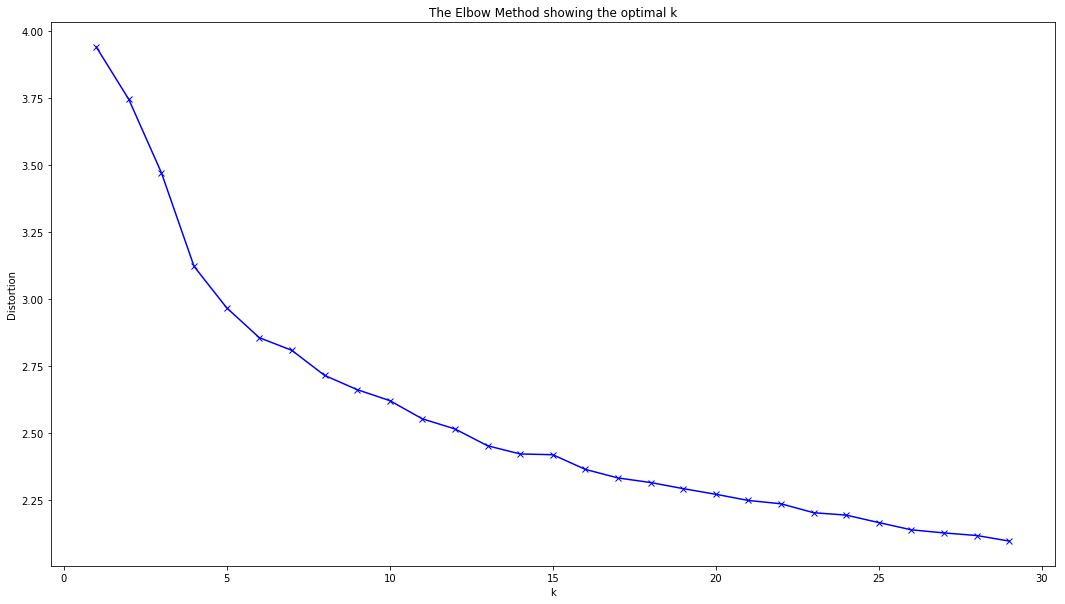

In [20]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [25]:
model_16_centroids = KMeans(n_clusters=16, max_iter=2000).fit(total)
result_16_centroids = model_16_centroids.predict(total)
counter_16_centroids = collections.Counter(result_16_centroids)
print(counter_16_centroids)

Counter({6: 94, 9: 84, 10: 55, 4: 49, 5: 47, 11: 44, 0: 34, 12: 29, 2: 20, 7: 17, 13: 7, 8: 6, 15: 4, 14: 4, 3: 1, 1: 1})


In [22]:
model_24_centroids = KMeans(n_clusters=24, max_iter=2000).fit(total)
result_24_centroids = model_24_centroids.predict(total)
counter_24_centroids = collections.Counter(result_24_centroids)
print(counter_24_centroids)

Counter({7: 52, 11: 50, 21: 45, 17: 42, 8: 38, 5: 36, 19: 29, 2: 28, 9: 27, 22: 26, 14: 25, 4: 25, 0: 23, 18: 19, 15: 8, 10: 5, 6: 4, 3: 3, 13: 3, 20: 3, 12: 2, 23: 1, 1: 1, 16: 1})


In [23]:
model_25_centroids = KMeans(n_clusters=25, max_iter=2000).fit(total)
result_25_centroids = model_25_centroids.predict(total)
counter_25_centroids = collections.Counter(result_25_centroids)
print(counter_25_centroids)

Counter({17: 79, 0: 48, 16: 47, 4: 47, 8: 35, 12: 35, 3: 30, 20: 29, 9: 28, 13: 27, 7: 18, 23: 17, 5: 17, 24: 10, 21: 7, 6: 5, 22: 3, 10: 3, 15: 3, 11: 3, 2: 1, 14: 1, 18: 1, 1: 1, 19: 1})


In [24]:
model_26_centroids = KMeans(n_clusters=26, max_iter=2000).fit(total)
result_26_centroids = model_26_centroids.predict(total)
counter_26_centroids = collections.Counter(result_26_centroids)
print(counter_26_centroids)

Counter({3: 49, 25: 48, 14: 46, 4: 41, 16: 38, 13: 31, 19: 30, 23: 30, 11: 29, 0: 25, 6: 24, 20: 22, 9: 16, 21: 15, 2: 12, 24: 10, 15: 6, 8: 5, 5: 5, 18: 4, 10: 4, 7: 2, 22: 1, 17: 1, 1: 1, 12: 1})


In [26]:
result = pd.DataFrame(result_24_centroids)
result.columns = ['Label']
frames = [pd.Series(total.index.values), result]
final = pd.concat(frames, axis=1)
final.to_csv("clustering_total_data.csv", index=False)
final.to_json(r'clustering_total_data.json')